# Hate Speech Classification

## EDA

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

In [17]:
os.getcwd()
os.chdir('..')

In [18]:
os.getcwd()

'/home/adam/Desktop/Projects/HateSpeechDetection'

In [47]:
initial_tweet_data = pd.read_csv("datasets/skewed_data.csv")


In [48]:
initial_tweet_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [49]:
initial_tweet_data['label'].value_counts()


label
0    29720
1     2242
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

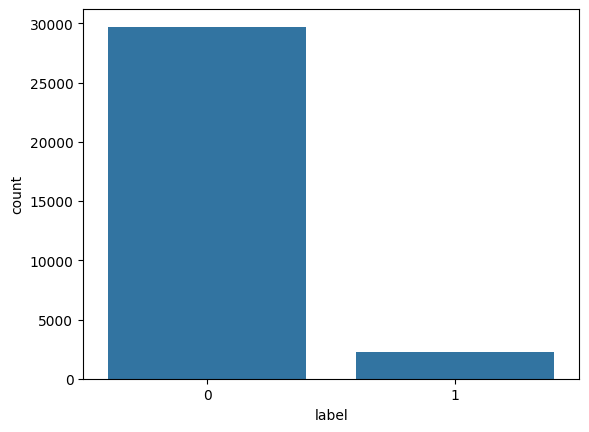

In [50]:
sns.countplot(x='label',data =initial_tweet_data)

Based on the above we can see that the dat is very imbalanced with the vast majority of examples falling under class 0 (no hate)

In [51]:
initial_tweet_data.shape

(31962, 3)

In [52]:
# Check for null values
initial_tweet_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [53]:
# Drop ID column
initial_tweet_data.drop('id',axis=1, inplace =True)

To resolve the skewedness of the data, I will supplement it with examples from a secondary data set with more hate examples.

In [54]:
more_tweet_data = pd.read_csv("datasets/labeled_data.csv")

In [60]:
more_tweet_data.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"""
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; thats that """
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch"


In [64]:
# Drop irrelevant columns
more_tweet_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'], axis=1, inplace =True)

In [63]:
more_tweet_data['class'].unique()

array([2, 1, 0])

In [62]:
more_tweet_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Class 0: Hate   |   Class 1: Abusive Lang   |   Class 2: Neither

Since we are interested in both hate speech and abusive language, I will combine classes 0 and 1 and make other small alterations before concatenating the 2 data sets

In [65]:
more_tweet_data[more_tweet_data['class']==0]['class']=1

/tmp/ipykernel_705470/4233771053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_tweet_data[more_tweet_data['class']==0]['class']=1


In [66]:
more_tweet_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [69]:
more_tweet_data['class'].unique()
more_tweet_data[more_tweet_data['class']==0][:10]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad"
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican"
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn"
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers"
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao"
204,0,"""@NotoriousBM95: @_WhitePonyJr_ Ariza is a snake and a coward"" but at least he isn't a cripple like your hero Roach lmaoo"
219,0,"""@RTNBA: Drakes new shoes that will be released by Nike/Jordan.... Yes, there's glitter on the shoes http://t.co/QCtPLxHEXM"" ....dudes a fag"
260,0,"""@TheoMaxximus: #GerrysHalloweenParty http://t.co/3ycrSrnjHc"" Halloween was yesterday stupid nigger"
312,0,"""@ashlingwilde: @ItsNotAdam is bored supposed to be cute, you faggot?"" Sometimes"
315,0,"""@bigbootybishopp: @white_thunduh lassen cc , the coach wants me"" i feel it youll get more my nig no doubt"


In [70]:
# Replace 0's with 1 ('hate' = 0 in more_tweet_data but 'hate' = 1 in initial_tweet_data)
more_tweet_data["class"].replace({0:1},inplace=True)

In [71]:
more_tweet_data["class"].unique()

array([2, 1])

In [72]:
# Replace 2's with to 0 ('no hate' = 2 in more_tweet_data but 'no hate' = 0 in initial_tweet_data)
more_tweet_data["class"].replace({2:0}, inplace = True)

In [73]:
# Rename 'class' to 'label'
more_tweet_data.rename(columns={'class':'label'},inplace =True)

In [75]:
# Concatenate both data sets
balanced_data = [initial_tweet_data, more_tweet_data]
df = pd.concat(balanced_data)

In [76]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

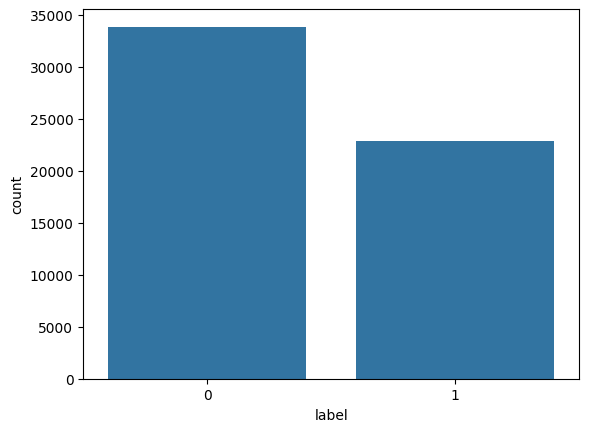

In [77]:
sns.countplot(x='label',data=df)

In [78]:
df.shape

(56745, 2)

Now the data set no longer suffers from the extreme imbalance seen before